In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
import yfinance as yf

start = '2015-01-01'
end = '2024-07-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head(10))


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.402176  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.714720  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.716951  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.049519  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  24.973549  237458000
2015-01-09  28.167500  28.312500  27.552500  28.002501  25.000341  214798000
2015-01-12  28.150000  28.157499  27.200001  27.312500  24.384314  198603200
2015-01-13  27.857500  28.200001  27.227501  27.555000  24.600813  268367600
2015-01-14  27.260000  27.622499  27.125000  27.450001  24.507074  195826400
2015-01-15  27.500000  27.514999  26.665001  26.705000  23.841949  240056000


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.960007,41601300
2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402176,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714720,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716951,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049519,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973549,237458000


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


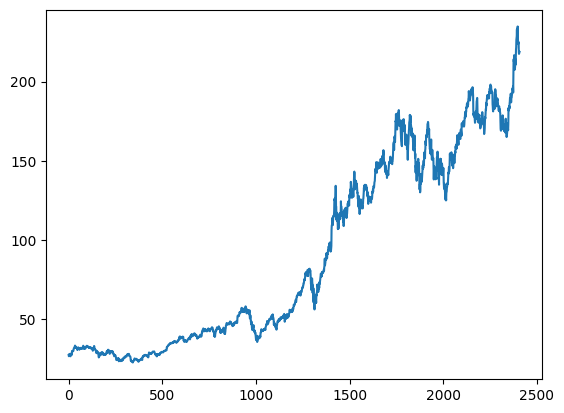

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2404,224.000000,224.800003,217.130005,218.539993,61777600
2405,218.929993,220.850006,214.619995,217.490005,51391200
2406,218.699997,219.490005,216.009995,217.960007,41601300
2407,216.960007,219.300003,215.750000,218.240005,36311800


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2404,190.4912
2405,190.8695
2406,191.2981
2407,191.7793


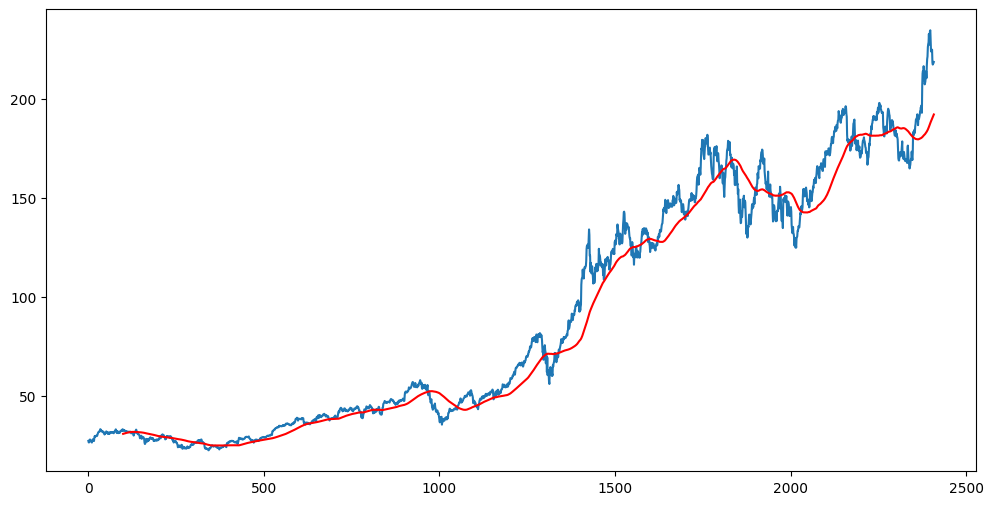

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2404,188.12235
2405,188.32235
2406,188.51720
2407,188.71645


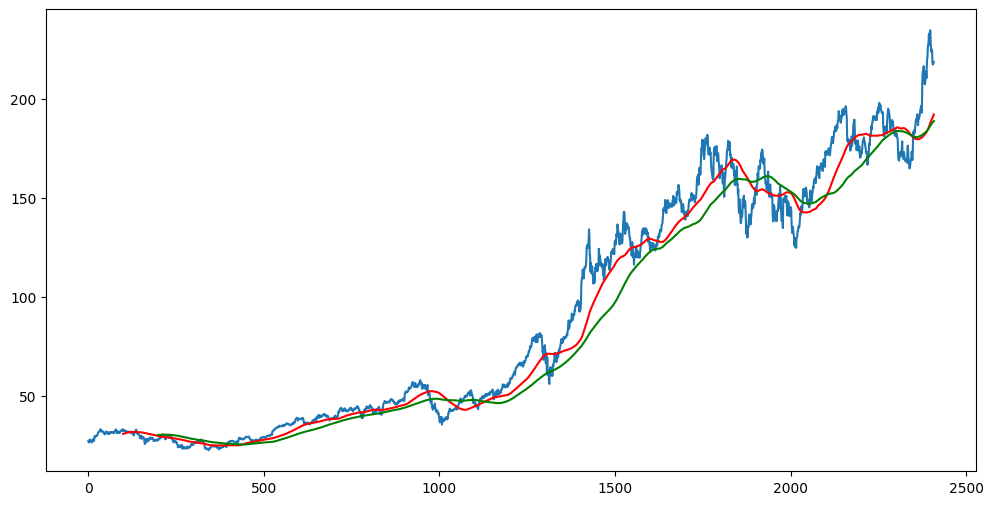

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(2409, 5)

In [ ]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1686, 1)
(723, 1)


In [ ]:
data_training.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [ ]:
data_testing.head()

,Close
1686,148.119995
1687,149.029999
1688,148.789993
1689,146.059998
1690,142.940002


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03540137],
       [0.0296596 ],
       [0.02967825],
       ...,
       [0.98046311],
       [0.94243316],
       [0.94675814]])

In [ ]:
data_training_array.shape

(1686, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1586, 100, 1)

In [ ]:
#ML MODEL


In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))




model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)



Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - loss: 0.0704
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 314ms/step - loss: 0.0072
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - loss: 0.0069
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - loss: 0.0052
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - loss: 0.0050
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 315ms/step - loss: 0.0045
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - loss: 0.0042
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 303ms/step - loss: 0.0047
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step - loss: 0.0053
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - loss: 0.0041
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 325ms/step - loss: 0.0044
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 308ms/step - loss: 0.0047
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - loss: 0.0038
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - loss: 0.0037
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [ ]:
model.save('my_model.keras')

In [ ]:
data_testing.head()

,Close
1686,148.119995
1687,149.029999
1688,148.789993
1689,146.059998
1690,142.940002


In [ ]:
data_training.tail(100)

,Close
1586,131.940002
1587,134.320007
1588,134.720001
1589,134.389999
1590,133.580002
...,...
1681,156.690002
1682,155.110001
1683,154.070007
1684,148.970001


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
# Use pd.concat to combine DataFrames instead of append.

In [ ]:
final_df.head()

,Close
0,131.940002
1,134.320007
2,134.720001
3,134.389999
4,133.580002


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08183851],
       [0.10307907],
       [0.10664885],
       [0.10370372],
       [0.09647483],
       [0.09558231],
       [0.07755475],
       [0.08719318],
       [0.04533692],
       [0.04756813],
       [0.06220445],
       [0.06639901],
       [0.03641233],
       [0.02802326],
       [0.        ],
       [0.01963413],
       [0.04176707],
       [0.03123605],
       [0.01856316],
       [0.01713526],
       [0.04051763],
       [0.02373943],
       [0.03864348],
       [0.03685859],
       [0.03641233],
       [0.02240073],
       [0.01642127],
       [0.01347614],
       [0.02043731],
       [0.00687197],
       [0.02784473],
       [0.027934  ],
       [0.03543062],
       [0.0389112 ],
       [0.02980815],
       [0.04087462],
       [0.06880855],
       [0.06131193],
       [0.06586342],
       [0.08049974],
       [0.06863016],
       [0.08505137],
       [0.10004461],
       [0.09754573],
       [0.09495766],
       [0.09228026],
       [0.1071843 ],
       [0.121

In [ ]:
input_data.shape

(823, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(723, 100, 1)
(723,)


In [ ]:
# making predictions

y_predicted = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step


In [ ]:
y_predicted.shape

(723, 1)

In [ ]:
y_test

array([0.22623825, 0.23435966, 0.23221771, 0.20785363, 0.18000896,
       0.18438192, 0.20597954, 0.21472559, 0.21552877, 0.20169564,
       0.17081665, 0.17902725, 0.16715753, 0.17742075, 0.1460955 ,
       0.16367695, 0.17161983, 0.18313248, 0.1796519 , 0.17884872,
       0.16724673, 0.16189206, 0.18732705, 0.19696562, 0.21222672,
       0.23194998, 0.23641227, 0.23837569, 0.23132533, 0.23087907,
       0.23694786, 0.2327533 , 0.26595277, 0.24123163, 0.23373501,
       0.24319505, 0.2563142 , 0.25158418, 0.25443998, 0.24694336,
       0.25024541, 0.22445336, 0.2240071 , 0.24292732, 0.24301652,
       0.2519411 , 0.27416337, 0.31325297, 0.33717093, 0.3413655 ,
       0.34484608, 0.3495761 , 0.30379293, 0.33440433, 0.37956272,
       0.3748327 , 0.36581878, 0.34868359, 0.37974125, 0.43203919,
       0.46684516, 0.46220434, 0.50584556, 0.47273542, 0.46015172,
       0.50450693, 0.44167776, 0.43168227, 0.4192771 , 0.44819281,
       0.47184291, 0.47755464, 0.51369924, 0.50441759, 0.50522

In [ ]:
y_predicted

array([[0.26574996],
       [0.26950163],
       [0.27227816],
       [0.2736634 ],
       [0.27310482],
       [0.2701988 ],
       [0.26532617],
       [0.2594797 ],
       [0.25320473],
       [0.24725269],
       [0.24160413],
       [0.2364111 ],
       [0.23173288],
       [0.22746105],
       [0.22351176],
       [0.21971022],
       [0.21602412],
       [0.21250704],
       [0.20932725],
       [0.2066876 ],
       [0.2047382 ],
       [0.20345   ],
       [0.20267451],
       [0.20238438],
       [0.20260465],
       [0.20343836],
       [0.20501676],
       [0.207295  ],
       [0.21012993],
       [0.21335448],
       [0.2168517 ],
       [0.22045472],
       [0.2242366 ],
       [0.22814041],
       [0.2319894 ],
       [0.23566496],
       [0.23911381],
       [0.24230686],
       [0.24529117],
       [0.24798696],
       [0.25033087],
       [0.25232232],
       [0.25381297],
       [0.2545237 ],
       [0.25446653],
       [0.25379452],
       [0.25277948],
       [0.251

In [ ]:
scaler.scale_

array([0.00892459])

In [ ]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

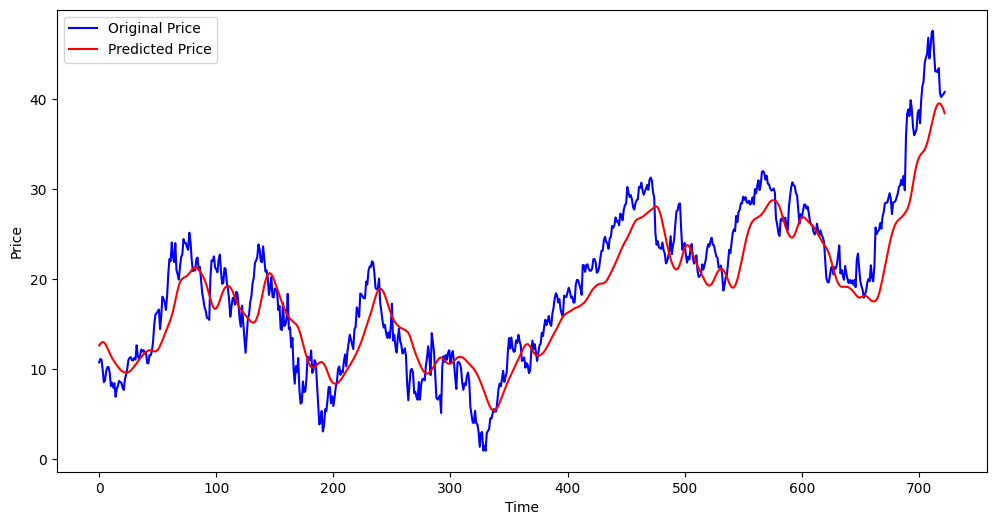

In [ ]:


plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
